# Classificando caracteres utilizando rede MLP.
Este exemplo utiliza a base de dados MNIST, que consiste em imagens de caracteres numéricos escritos à mão.

## Etapa 01
Importar as bibliotecas de aprendizado de máquina e computação científica.

In [1]:
# Bibliotecas de aprendizado de máquina
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

# Bibliotecas de computação científica
import numpy as np
import matplotlib.pyplot as plt

2024-10-02 15:30:30.127063: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 15:30:30.136420: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 15:30:30.172665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 15:30:30.229088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 15:30:30.246205: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 15:30:30.283660: I tensorflow/core/platform/cpu_feature_gu

## Etapa 02
Importar a base de dados MNIST do keras

Curiosidade: o Keras fornece um conjunto de base de dados para aprendizado. Veja mais em: https://keras.io/api/datasets/

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Etapa 03
Conhecer e plotar a base de dados

In [3]:
# Verificar a quantidade de dados para treinamento e validação
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


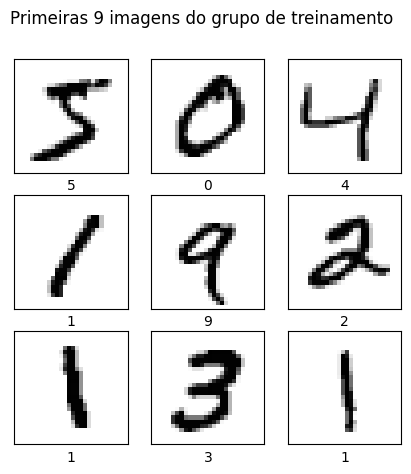

In [4]:
# Plotar imagem
plt.figure(figsize=(5,5))
plt.suptitle('Primeiras 9 imagens do grupo de treinamento')
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

In [5]:
x_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Etapa 04
Pré-processar as imagens de forma que os valores de intensidade para os pixels fiquem entre 0 e 1.

In [8]:
x_train = x_train / 255
x_test = x_test / 255

In [9]:
x_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

## Etapa 05
Construir a rede neural utilizando o Keras.

Primeira camada (entrada): transforma o array bidimensional (28,28) para um array unidimensional (28*28=784).

Segunda camada: Uma camada com 128 neurônios.

Terceira camada (saída): implementa uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertença a uma das 10 classes.

In [11]:
keras.backend.clear_session()
model = Sequential()
model.add(Flatten(input_shape=(28, 28))),
model.add(Dense(128, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.summary()

/home/fbaltor/.pyenv/versions/3.11.10/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Etapa 06
Compilar o modelo.

Optimizer: As opções são encontradas em https://keras.io/api/optimizers/

Loss: As opções são encontradas em https://keras.io/api/losses/

Metrics: As opções são encontradas em https://keras.io/api/metrics/

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

## Etapa 07
Treinar o modelo e realizar a validação.

Epoch 1/30


2024-10-02 15:31:06.730913: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.8761 - loss: 0.4391

2024-10-02 15:31:26.202659: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - categorical_accuracy: 0.8761 - loss: 0.4390 - val_categorical_accuracy: 0.9602 - val_loss: 0.1376
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - categorical_accuracy: 0.9654 - loss: 0.1225 - val_categorical_accuracy: 0.9685 - val_loss: 0.1028
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - categorical_accuracy: 0.9763 - loss: 0.0778 - val_categorical_accuracy: 0.9729 - val_loss: 0.0889
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - categorical_accuracy: 0.9822 - loss: 0.0575 - val_categorical_accuracy: 0.9738 - val_loss: 0.0812
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9873 - loss: 0.0427 - val_categorical_accuracy: 0.9724 - val_loss: 0.0881
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9902 - loss: 0.0327 - val_categorical_accuracy: 0.9791 - val_loss: 0.0666
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.

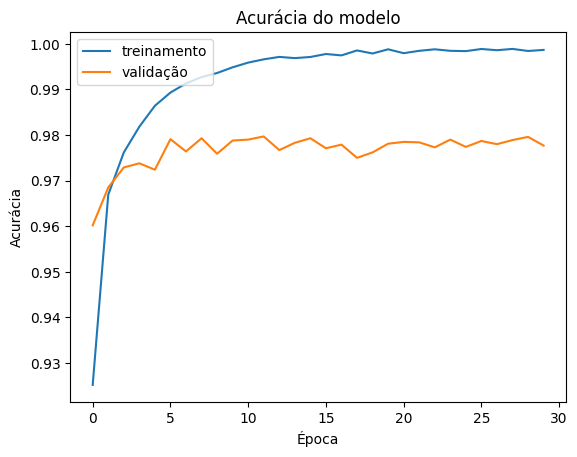

In [13]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

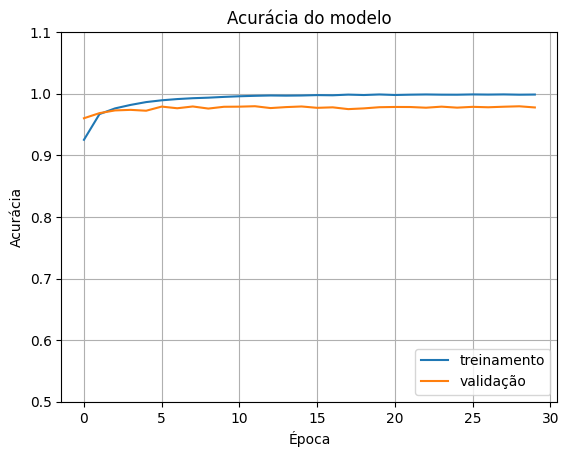

In [22]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylim(.5, 1.1)
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='lower right')
plt.grid()
plt.show()

## Etapa 08
Realizar algumas predições. Experimente variar a amostra (variável i).

In [23]:
y_test[i].astype('uint8')

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

 25/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

2024-10-02 15:41:23.412920: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


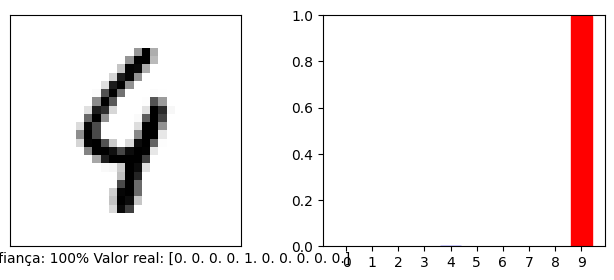

In [25]:
predictions = model.predict(x_test)
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 115

def plot_image(prediction_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(prediction_array)
  plt.xlabel('Predito: {} Confiança: {:2.0f}% Valor real: {}'.format(predicted_label, 100*np.max(prediction_array), true_label))

def plot_rate(prediction_array, true_label):
  print(true_label)
  plt.grid(False)
  plt.xticks(range(10), class_names)
  thisplot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  true_label_index = np.argmax(true_label)  # This converts to integer index
  thisplot[true_label_index].set_color('blue')

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(predictions[i], y_test[i], x_test[i])
plt.subplot(1,2,2)
plot_rate(predictions[i], y_test[i])
plt.show()

## Etapa 09
Encontrar todas as predições erradas.

In [32]:
error_classification = []

for i in range(len(predictions)):
  if (np.argmax(predictions[i]) != np.argmax(y_test[i])):
    error_classification.append(i)

print('Total de predições erradas: ', len(error_classification))
print('Lista das predições erradas: ', error_classification)

10000
Total de predições erradas:  223
Lista das predições erradas:  [8, 33, 115, 149, 151, 217, 247, 321, 339, 340, 381, 445, 449, 582, 610, 613, 619, 684, 691, 707, 720, 844, 883, 938, 951, 956, 1014, 1039, 1044, 1112, 1128, 1156, 1178, 1181, 1226, 1232, 1242, 1247, 1328, 1331, 1393, 1414, 1496, 1500, 1522, 1527, 1530, 1549, 1609, 1678, 1681, 1717, 1721, 1754, 1790, 1800, 1901, 1913, 1941, 1987, 2004, 2016, 2024, 2029, 2035, 2044, 2053, 2070, 2093, 2109, 2129, 2130, 2135, 2162, 2174, 2182, 2185, 2224, 2280, 2291, 2293, 2299, 2329, 2369, 2387, 2597, 2607, 2610, 2654, 2743, 2771, 2810, 2877, 2896, 2915, 2921, 2927, 2939, 2945, 2953, 3073, 3117, 3225, 3405, 3422, 3490, 3503, 3520, 3558, 3567, 3749, 3751, 3762, 3780, 3796, 3808, 3853, 3893, 3902, 3941, 3943, 4027, 4078, 4156, 4176, 4194, 4199, 4248, 4271, 4289, 4330, 4382, 4419, 4425, 4437, 4443, 4534, 4551, 4567, 4571, 4578, 4690, 4740, 4807, 4814, 4823, 4830, 4833, 4838, 4860, 4880, 4966, 5078, 5140, 5331, 5457, 5600, 5642, 5649, 5654,

# Informação complementar
## Realizar a predição de uma única imagem

Na Etapa 08, realizamos a predição de todas as amostras de validação e plotamos o resultado de uma única amostra para visualização, isso porque o Keras é otimizado para trabalhar com batch (coleções) de dados. Para realizar a predição de uma única imagem, os passos abaixo são necessários.

In [41]:
# Escolha da imagem
from random import randrange

img_index = randrange(len(x_test))
img = x_test[img_index]
print(img.shape)

(28, 28)


Como o Keras trabalha com batch, é preciso adicionar a imagem desejada em uma lista cujo único elemento seja a imagem que se deseja predizer. Para isso, basta expandir as dimensões da imagem para 3, sendo o primeiro elemento a posição na lista.

In [42]:
# Reshape
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Com a única imagem na lista, é possível realizar a sua predição.

In [43]:
value_predicted = model.predict(img)
print(value_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[2.9847251e-19 2.7761011e-19 1.4812221e-16 3.7017703e-15 8.8607664e-22
  1.2372207e-23 6.9481502e-32 1.0000000e+00 3.3823370e-15 3.7062374e-14]]


Por fim, encontramos a maior probabilidade e exibimos o resultado, como na Etapa 08

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


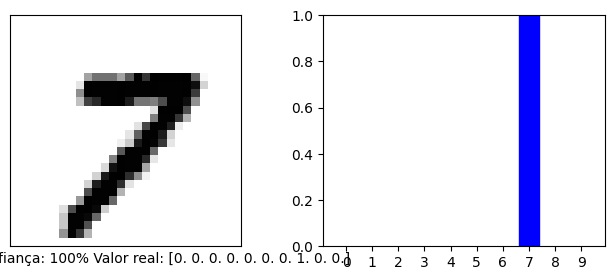

In [44]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(value_predicted, y_test[img_index], x_test[img_index])
plt.subplot(1,2,2)
plot_rate(value_predicted[0], y_test[img_index])
plt.show()